In [214]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from pathlib import Path
import pandas as pd

plt.style.use('ggplot')

In [276]:
INF = 999999

def plot_explored(f, steps=-1, box=INF):
    explored = pd.read_csv(f, delimiter=',', dtype=None)
    total_explored = len(explored.index)
 
    if steps == -1:
        max_steps = len(explored)
    else:
        explored = explored[:steps]  # prefix
        max_steps = steps
    
    if box == INF:
        n, m = max(explored[:,0]) + 1, max(explored[:,1]) + 1
    else:
        n, m = box, box
    
    img = np.ones((n, m, 4))
    img.fill(0.97)  # grey
    
    #for cnt,(i,j) in enumerate(explored):
    for index, row in explored.iterrows():
        i, j, inpath = row['i'], row['j'], row['inpath']
        if max(i,j) >= box:
            continue
        if row['inpath']:
            img[i,j] = mcolors.to_rgba('xkcd:rust brown')
        else:
            val = index / max_steps
            if val <= 1.0:
                img[i,j] = cm.cool(val)
    
    fig, ax = plt.subplots()
    title = f.stem
    ax.set_title('{} ({})'.format(title, total_explored), y=-0.01)
    ax.xaxis.tick_top()
    ax.grid(False)
    
    ax.imshow(img)
    fig.savefig('imgs/'+title+'.png')

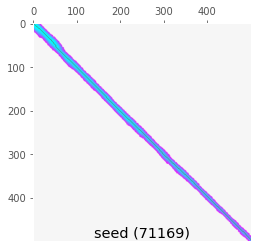

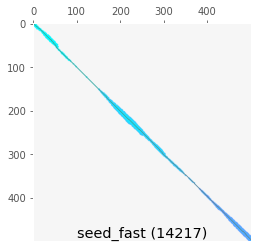

In [277]:
d = Path('stats/')
min_steps = 10000000
all_files = list(d.glob('*.csv'))
some_files = [d/'seed.csv', d/'seed_fast.csv']

files = some_files
for f in files:
    explored = pd.read_csv(f, delimiter=',', dtype=None)
    min_steps = min(min_steps, len(explored))
for f in files:
    plot_explored(f, box=500, steps=min_steps)